In [4]:
#importing
import pandas as pd

In [6]:
#initializing datasets
df1= pd.read_csv("fct_invoice.csv")
df2= pd.read_json("dim_customer.json")

In [8]:
df1

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [54]:
#Easy1. How many unique customers are in the dataset?
len(pd.unique(df1["customer_id"]))

5191

In [32]:
#Easy2. What are the different categories of products available?
df1["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [56]:
#Easy2. How many unique categories are there?
df1["category"].nunique()

8

In [62]:
#Easy3. Which payment method is the most popular? How many times was it used?
df1["payment_method"].value_counts().head(1)

payment_method
Cash    44447
Name: count, dtype: int64

In [11]:
#Medium1. What are the three most popular categories, by total sales?
df1["total_sales"] = df1["quantity"] * df1["price"]
popcategory = df1.groupby("category")["total_sales"].sum()
top3 = popcategory.sort_values(ascending=False).head(3)
top3

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [10]:
#Medium2. What are the total sales attributed to customers over the age of 45?
df2

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [25]:
filtered = df2.query("age > 45")["id"]
filtered_df = df1[df1["customer_id"].isin(filtered)]
filtered_df["total_sales"].sum()

82039768.15

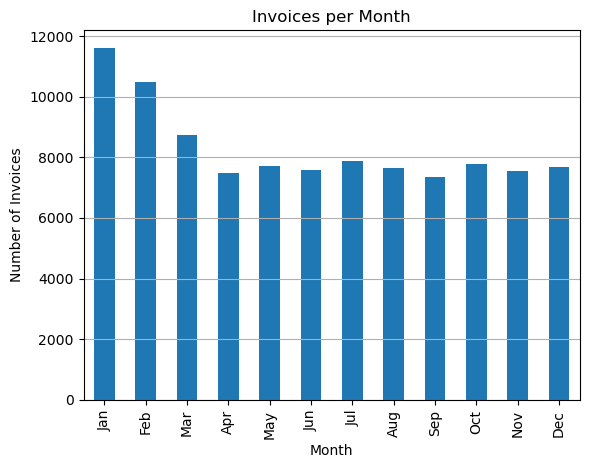

In [12]:
#Medium3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
import matplotlib.pyplot as plt

df1plot = df1.copy()
df1plot["invoice_date"] = pd.to_datetime(df1plot["invoice_date"], format = "%d/%m/%Y")
monthaxis = df1plot["invoice_date"].dt.month
df1plot.groupby(monthaxis).size().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Invoices")
plt.title("Invoices per Month")
plt.grid(axis= "y")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

In [22]:
#Hard1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

copy_of_df1 = df1.copy()
copy_of_df2 = df2.copy()
df1edited = copy_of_df2.merge(copy_of_df1, left_on = "id", right_on = "customer_id")
df1edited["age"].fillna(0, inplace=True)
df1edited["decade"] = (df1edited["age"] // 10*10).astype(int)
df1edited["decade"] = df1edited["decade"].astype(str) + "-" + (df1edited["decade"] + 9).astype(str)
df1edited["total_sales"] = df1edited["quantity"] * df1edited["price"]
df1edited.pivot_table(index = ["category"], columns = ["decade"], values = ["total_sales"], aggfunc = "sum")
df1edited.pivot_table(index = ["category"], values = "total_sales", aggfunc = "sum")

,total_sales
category,
Books,8.345529e+05
Clothing,1.139968e+08
Cosmetics,6.792863e+06
Food & Beverage,8.495351e+05
Shoes,6.655345e+07
Souvenir,6.358247e+05
Technology,5.786235e+07
Toys,3.980426e+06


In [24]:
df1edited.pivot_table(index = ["category"], columns = ["decade"], values = ["total_sales"], aggfunc = "sum")

total_sales                                        \
decade                   0-9       10-19        20-29        30-39   
category                                                             
Books              334012.05    12801.75     79461.75     84143.10   
Clothing         46003764.40  1927413.84  10250732.80  11354126.96   
Cosmetics         2777362.62   109619.36    605915.32    723544.70   
Food & Beverage    345875.59    13582.31     73491.96     87246.86   
Shoes            26468097.17   993281.35   5924878.24   7200839.66   
Souvenir           265661.04    12375.15     54943.32     64092.72   
Technology       23865450.00  1129800.00   5261550.00   6159300.00   
Toys              1587210.24    60426.24    385100.80    420582.40   

                                                                                
decade                 40-49        50-59        60-69       70-79       80-89  
category                                                                        
Books               87203.40     74962.20     80476.80    54827.85    26664.00  
Clothing         11215189.92  10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          665034.96    587780.96    649990.76   419082.62   254531.60  
Food & Beverage     89553.29     72425.04     80976.09    55050.98    31332.93  
Shoes             7025590.02   5852857.84   5978893.54  4480269.05  2628744.60  
Souvenir            66391.80     54943.32     55025.43    38673.81    23718.06  
Technology        5954550.00   4435200.00   5471550.00  3638250.00  1946700.00  
Toys               390906.88    345067.52    363955.20   273244.16   153932.80